<a href="https://colab.research.google.com/github/HarshilShinde/BrainTumorRepository/blob/main/HarshilBrainTumorExplorationRatheshwarSir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Steps involved in solving a problem in Deep Learning


1. Environment Setup: Import Necessary packages
2. Loading of Input: Data importing and Exploration, Preprocessing 
3. Split the data into two parts: "Training images and Testing images" 
4. Building a Deep learningModel:Using appropriate algorithm,Train the model with training image, and saving the model with weights.
5. Model Evaluation: Getting Accuracy for the predicted model
6. Finally observing the model with testing image to get final prediction.





#(1) Environment Setup
listdir- To get the list of all files and directories in the specified

time- This function returns the number of seconds passed since epoch

cv2- Loads an image from the specified file

tensorflow- TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks.

shuffle- The shuffle() method takes a sequence (list, string, or tuple and data) and reorganize the order of the items.

numpy- ) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

matplotlib- is a library creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels

imutils- A series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, and displaying Matplotlib images easier with OpenCV.

sklearn.metrics- implements several loss, score, and utility functions to measure classification performance.

sklearn.model_selection- that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.

Keras- is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow,Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

tensorflow.keras.callbacks- A custom callback is a powerful tool to customize the behavior of a Keras model during training, evaluation, or inference, including reading/changing the Keras model.

In [1]:
from os import listdir
import time
import cv2
import imutils
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Hidden Layers
A hidden layers is nothing but number of hidden patterns associated between input(x) and output(y)

**Zero Padding=>** symmetrically adding zeroes to the input matrix

**Convolutional 2D=>** Calculates dot product of pixel value

**Batch Normalization=>** Improves performance, stability of CNN

**Relu=>** An activation function in Neural Network

**Maxpool=>** A Sample based discretization process for input data.

**Flattern=>** Pooled features mapped into single column.

**Dense=>** To connect the pooled features into connected layer.

#(2) Loading of Input-Data importing, Exploration, Preprocessing

In [2]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)
#PIL- Python Image Library, it supports opening, manipulating and saving many different image fil

Pillow Version: 7.1.2


In [3]:
from PIL import Image
image = Image.open('no/no 1.jpg')
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(225, 225)


uint8
(168, 300, 3)


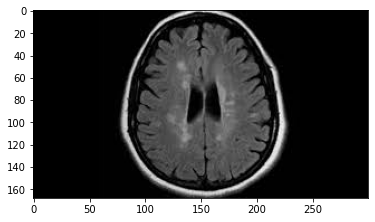

In [4]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread('no/13 no.jpg')
print(data.dtype)
print(data.shape)
pyplot.imshow(data)
pyplot.show()

(218, 180, 3)
JPEG
RGB
(180, 218)


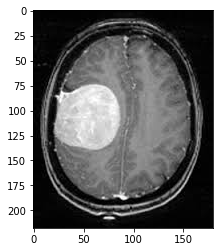

In [5]:
from PIL import Image
from numpy import asarray
image = Image.open('yes/Y1.jpg')
data = asarray(image)
print(data.shape)
print(image.format)
print(image.mode)
print(image.size)
pyplot.imshow(data)
pyplot.show()

In [6]:
#loading all the images in a directory
from matplotlib import image
from os import listdir
loaded_images = list()
for filename in listdir('yes'):
    brain_tumor = image.imread('yes/' + filename)
    loaded_images.append(brain_tumor)
    print('>Loaded %s %s' %(filename, brain_tumor.shape))

>Loaded Y251.JPG (349, 278, 3)
>Loaded Y25.jpg (630, 504, 3)
>Loaded Y71.JPG (349, 300, 3)
>Loaded Y184.JPG (173, 189, 3)
>Loaded Y52.jpg (938, 911)
>Loaded Y35.jpg (446, 450, 3)
>Loaded Y42.jpg (210, 200, 3)
>Loaded Y24.jpg (1024, 1024)
>Loaded Y181.jpg (380, 310, 3)
>Loaded Y44.JPG (337, 293, 3)
>Loaded Y242.JPG (344, 279, 3)
>Loaded Y60.jpg (255, 197, 3)
>Loaded Y95.jpg (225, 225, 3)
>Loaded Y245.jpg (237, 213, 3)
>Loaded Y33.jpg (512, 512, 3)
>Loaded Y103.jpg (993, 825, 3)
>Loaded Y159.JPG (354, 303, 3)
>Loaded Y14.jpg (300, 289)
>Loaded Y183.jpg (347, 300, 3)
>Loaded Y21.jpg (247, 204, 3)
>Loaded Y30.jpg (325, 300)
>Loaded Y250.jpg (236, 213, 3)
>Loaded Y34.jpg (380, 310, 3)
>Loaded Y100.JPG (348, 287, 3)
>Loaded Y20.jpg (300, 240, 3)
>Loaded Y31.jpg (294, 250)
>Loaded Y186.jpg (450, 355, 3)
>Loaded Y77.jpg (353, 300, 3)
>Loaded Y58.JPG (340, 314, 3)
>Loaded Y79.jpg (431, 400, 3)
>Loaded Y170.JPG (355, 290, 3)
>Loaded Y92.png (300, 240)
>Loaded Y62.jpg (294, 250)
>Loaded Y101.jpg 

In [7]:
from matplotlib import image
from os import listdir
loaded_images = list()
for filename in listdir('no'):
    non_tumor = image.imread('no/' + filename)
    loaded_images.append(non_tumor)
    print('>Loaded %s %s' %(filename, non_tumor.shape))

>Loaded N22.JPG (326, 276, 3)
>Loaded 27 no.jpg (231, 218, 3)
>Loaded 28 no.jpg (251, 201, 3)
>Loaded No20.jpg (444, 468, 3)
>Loaded no 91.jpeg (442, 400, 3)
>Loaded no 4.jpg (275, 220)
>Loaded No22.jpg (449, 359, 3)
>Loaded 44no.jpg (442, 441, 3)
>Loaded 36 no.jpg (221, 228, 3)
>Loaded no 6.jpg (236, 214, 3)
>Loaded No13.jpg (442, 442)
>Loaded 47 no.jpg (225, 225, 3)
>Loaded 30 no.jpg (242, 208, 3)
>Loaded N26.JPG (264, 210, 3)
>Loaded no.jpg (512, 512, 4)
>Loaded 45 no.jpg (474, 356, 3)
>Loaded 20 no.jpg (259, 194, 3)
>Loaded 42 no.jpg (168, 300, 3)
>Loaded no 99.jpg (442, 409)
>Loaded 32 no.jpg (225, 225, 3)
>Loaded N21.jpg (1024, 1024)
>Loaded N1.JPG (338, 276, 3)
>Loaded no 10.jpg (750, 750)
>Loaded 25 no.jpg (217, 232, 3)
>Loaded 8 no.jpg (251, 201, 3)
>Loaded No12.jpg (537, 472, 3)
>Loaded 9 no.jpg (201, 173, 3)
>Loaded No11.jpg (630, 630, 3)
>Loaded 29 no.jpg (234, 215, 3)
>Loaded N15.jpg (225, 225)
>Loaded 26 no.jpg (252, 200, 3)
>Loaded 23 no.jpg (242, 208, 3)
>Loaded 12 no.j

#Saving the image into another format

In [14]:
from PIL import Image
image = Image.open('yes/Y108.jpg')
image.save('yes/Y108.png',format='PNG')
up_format = Image.open('yes/Y108.png')
print(up_format.format)

PNG


In [15]:
#resize of image
rs_size = Image.open('yes/Y108.jpg')
image.thumbnail((50,20))
print(image.size)

(18, 20)


In [16]:
def brain_crop(image, plot=False):
   
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image